In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from pathlib import Path

### Open example forecast from S2S ECMWF Real Time forecast

S2S = sub seasonal to seasonal

This notebook first encourages you to practice opening a sample file.
We've placed a sample file in the shared space /home/esp-shared-a/Distribution/Workshops/PolarClimate_2024/sea_ice_projects/sea_ice_project_12/scripts/mars_requests_s2s/test_forecast.grib

There is a time in the file that corresponds to the initial date of the forecast. Each file has just one initial date. You'll see the dimensions of the file are unusual. Study them and understand them before going on. Number refers to ensemble member number and step is a number of days in the future that the forecast corresponds to. Another term is forecast valid date, which is the initial date plus the step.

Xarray creates a helper "idx" file, which we'll place in your local directory. It isn't important, and gives an warning when you try to write over it. 

The second part will then open the whole dataset and do a sample calculation. Specifically, we'll compute the standard deviation across the ensemble members, which gives us a measure of the uncertainty of the forecast - or the confidence of the forecast. A large standard deviation generally indicates high uncertainth and low confidence, but be aware that there is a natural seasonality that . 

In [2]:
testdir='/home/esp-shared-a/Distribution/Workshops/PolarClimate_2024/sea_ice_projects/sea_ice_project_12/scripts/mars_requests_s2s'
ds = xr.open_dataset(testdir+'/test_forecast.grib', engine='cfgrib', indexpath='./tmp.idx')

### Visualize the content of the grib file with xarray

In [4]:
ds

<xarray.Dataset> Size: 534MB
Dimensions:     (number: 100, step: 46, latitude: 121, longitude: 240)
Coordinates:
  * number      (number) int64 800B 1 2 3 4 5 6 7 8 ... 93 94 95 96 97 98 99 100
    time        datetime64[ns] 8B ...
  * step        (step) timedelta64[ns] 368B 1 days 2 days ... 45 days 46 days
    surface     float64 8B ...
  * latitude    (latitude) float64 968B 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time  (step) datetime64[ns] 368B ...
Data variables:
    ci          (number, step, latitude, longitude) float32 534MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-22T10:11 GRIB to CDM+CF via cfgrib-0.9.1...

### Select two ensemble members (10, 30) at forecast day 45, and plot them

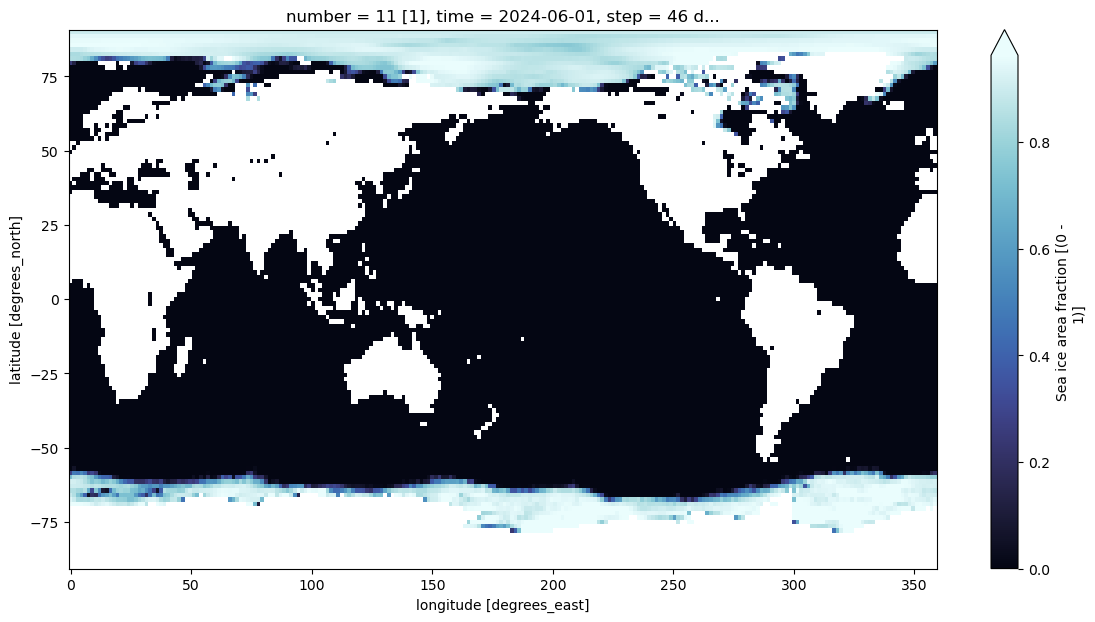

In [5]:
ds.ci.isel(number=10).isel(step=45).plot(x='longitude', y='latitude', cmap=cmocean.cm.ice, size=7, aspect=2, add_colorbar=True, robust=True)

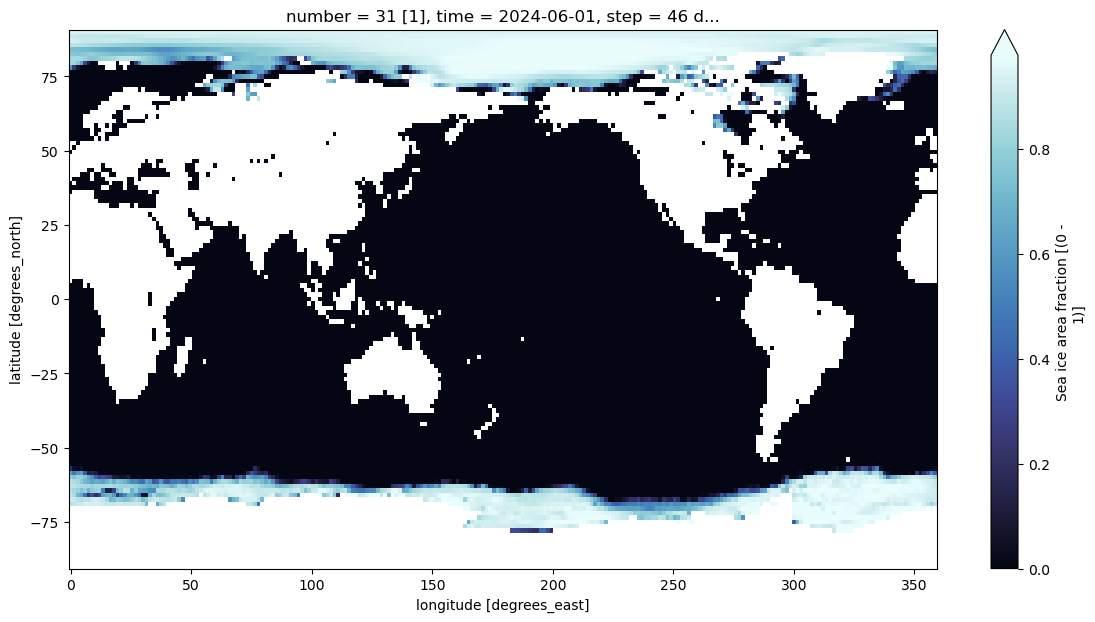

In [6]:
ds.ci.isel(number=30).isel(step=45).plot(x='longitude', y='latitude', cmap=cmocean.cm.ice, size=7, aspect=2, add_colorbar=True, robust=True)

In [3]:
forecastdir='/home/esp-shared-a/Distribution/Workshops/PolarClimate_2024/sea_ice_projects/sea_ice_project_12/data/forecasts/s2s_ens_ecmwf_sic/'

def sorted_directory_listing_with_pathlib_glob(directory):
    path_object = Path(directory)
    items = path_object.glob('*grib')
    sorted_items = sorted(items, key=lambda item: item.name)
    return [item.name for item in sorted_items]
files=sorted_directory_listing_with_pathlib_glob(forecastdir)
print(files)
print('the number of files is ',len(files))

['s2s_ens_ecmwf_sic_2016-01-04.grib', 's2s_ens_ecmwf_sic_2016-02-01.grib', 's2s_ens_ecmwf_sic_2016-03-03.grib', 's2s_ens_ecmwf_sic_2016-04-04.grib', 's2s_ens_ecmwf_sic_2016-05-02.grib', 's2s_ens_ecmwf_sic_2016-06-02.grib', 's2s_ens_ecmwf_sic_2016-07-04.grib', 's2s_ens_ecmwf_sic_2016-08-01.grib', 's2s_ens_ecmwf_sic_2016-09-01.grib', 's2s_ens_ecmwf_sic_2016-10-03.grib', 's2s_ens_ecmwf_sic_2016-11-03.grib', 's2s_ens_ecmwf_sic_2016-12-01.grib', 's2s_ens_ecmwf_sic_2017-01-02.grib', 's2s_ens_ecmwf_sic_2017-02-02.grib', 's2s_ens_ecmwf_sic_2017-03-02.grib', 's2s_ens_ecmwf_sic_2017-04-03.grib', 's2s_ens_ecmwf_sic_2017-05-01.grib', 's2s_ens_ecmwf_sic_2017-06-01.grib', 's2s_ens_ecmwf_sic_2017-07-03.grib', 's2s_ens_ecmwf_sic_2017-08-03.grib', 's2s_ens_ecmwf_sic_2017-09-04.grib', 's2s_ens_ecmwf_sic_2017-10-02.grib', 's2s_ens_ecmwf_sic_2017-11-02.grib', 's2s_ens_ecmwf_sic_2017-12-04.grib', 's2s_ens_ecmwf_sic_2018-01-01.grib', 's2s_ens_ecmwf_sic_2018-02-01.grib', 's2s_ens_ecmwf_sic_2018-03-01.grib', 

In [ ]:
# read in every file compute the std across the ensemble members
# always dies on file 63 if do in one loop, not sure why

# ignore the warnings about the tmp.idx 

# I had to do this in two chunks, not sure why
# here is the first chunk
for file in files[11:62]: # get one file at a time
    print(file)
    ds=xr.open_dataset(forecastdir+file,engine='cfgrib', indexpath='./tmp.idx')['ci']
    cistd=ds.std(dim='number')
    cistd=cistd.expand_dims('time')
    cistd.load() 
    fileparts=file.split('.')
    cistd.to_netcdf('data/'+fileparts[0]+'_std_members.nc')

In [8]:
# I had to do this in two chunks, not sure why
# here is the second chunk
for file in files[63:]: # get one file
    print(file)
    ds=xr.open_dataset(forecastdir+file,engine='cfgrib', indexpath='./tmp.idx')['ci']
    cistd=ds.std(dim='number')
    cistd=cistd.expand_dims('time')
    cistd.load() 
    fileparts=file.split('.')
    cistd.to_netcdf('data/'+fileparts[0]+'_std_members.nc')


s2s_ens_ecmwf_sic_2021-04-01.grib


Ignoring index file './tmp.idx' incompatible with GRIB file
/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-05-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-06-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-07-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-08-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-09-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-10-04.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-11-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2021-12-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-01-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-02-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-03-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-04-04.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-05-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-06-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-07-04.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-08-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-09-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-10-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-11-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2022-12-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-01-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-02-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-03-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-04-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-05-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-06-01.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-07-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-08-03.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-09-04.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-10-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-11-02.grib


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Ignoring index file './tmp.idx' incompatible with GRIB file


s2s_ens_ecmwf_sic_2023-12-04.grib
[]


/home/cbitz/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [15]:
stdall = []
for file in files[11:]: # get one file
    fileparts=file.split('.')
    ds=xr.open_dataset('data/'+fileparts[0]+'_std_members.nc')
    stdall.append(ds.ci)
stdall=xr.concat(stdall, "time")

In [16]:
stdall

<xarray.DataArray 'ci' (time: 85, step: 46, latitude: 121, longitude: 240)> Size: 454MB
array([[[[0.00132825, 0.00132825, 0.00132825, ..., 0.00132825,
          0.00132825, 0.00132825],
         [0.00531066, 0.00543563, 0.00557197, ..., 0.00492376,
          0.00504682, 0.00517565],
         [0.00693285, 0.0070088 , 0.00708797, ..., 0.00717494,
          0.00710142, 0.00702078],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[0.00148558, 0.00148558, 0.00148558, ..., 0.00148558,
          0.00148558, 0.00148558],
         [0.00469603, 0.00478913, 0.00488444, ..., 0.004442  ,
          0.00452075, 0.00460513],
         [0.00603286, 0.0060136 , 0.00600519, ..., 0.00624608,
          0.00620895, 0.00612006],
...
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[0.00900706, 0.00900706, 0.00900706, ..., 0.00900706,
          0.00900706, 0.00900706],
         [0.00955132, 0.01021006, 0.01094666, ..., 0.00878325,
          0.00902586, 0.00928288],
         [0.01249221, 0.01250613, 0.01255618, ..., 0.0125697 ,
          0.01244231, 0.01241828],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
  * time        (time) datetime64[ns] 680B 2016-12-01 2017-01-02 ... 2023-12-04
  * step        (step) timedelta64[ns] 368B 1 days 2 days ... 45 days 46 days
    surface     float64 8B 0.0
  * latitude    (latitude) float64 968B 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time  (time, step) datetime64[ns] 31kB 2016-12-02 ... 2024-01-19

In [34]:
stdallclimo=stdall.groupby("time.month").mean(dim="time")
stdallseas=stdall.groupby("time.season").mean(dim="time")

Standard deviation across the ensemble members
Row 1 = Jan, Row 2 = Feb, etc


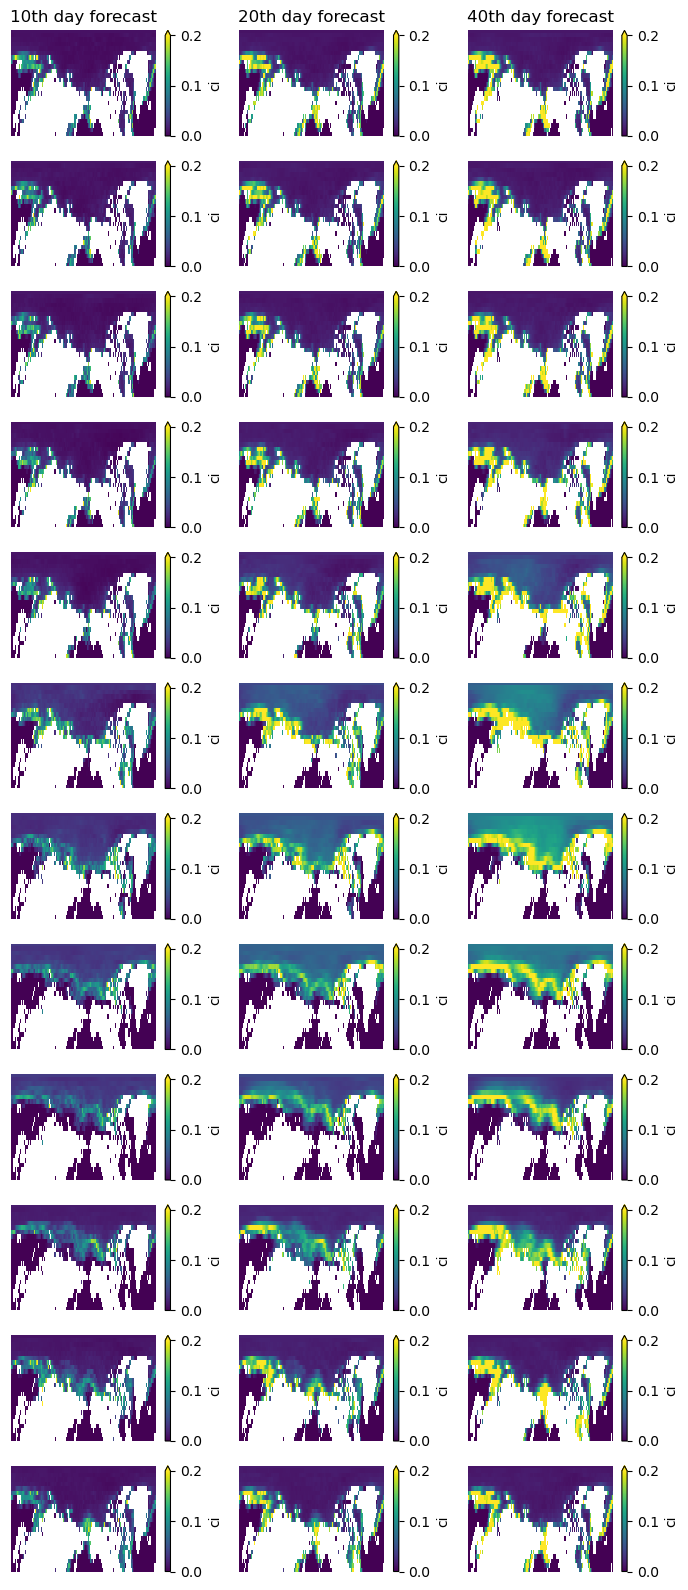

In [28]:
vmax=0.2
fig, axs = plt.subplots(12, 3, figsize=(7, 16))

for i in np.arange(0,12):
    stdallclimo.isel(step=9).isel(month=i).plot(ax=axs[i,0],vmax=vmax)
    axs[i,0].axis('off')
    axs[i,0].set_ylim([55,90])
    axs[i,0].set_title('')
    
    stdallclimo.isel(step=19).isel(month=i).plot(ax=axs[i,1],vmax=vmax)
    axs[i,1].axis('off')
    axs[i,1].set_ylim([55,90])
    axs[i,1].set_title('')
    
    stdallclimo.isel(step=39).isel(month=i).plot(ax=axs[i,2],vmax=vmax)
    axs[i,2].axis('off')
    axs[i,2].set_ylim([55,90])
    axs[i,2].set_title('')
    
axs[0,0].set_title('10th day forecast')
axs[0,1].set_title('20th day forecast')
axs[0,2].set_title('40th day forecast')

fig.tight_layout()
print('Standard deviation across the ensemble members')
print('Row 1 = Jan, Row 2 = Feb, etc')

In [35]:
stdallseas

<xarray.DataArray 'ci' (season: 4, step: 46, latitude: 121, longitude: 240)> Size: 21MB
array([[[[0.00222805, 0.00222805, 0.00222805, ..., 0.00222805,
          0.00222805, 0.00222805],
         [0.00347752, 0.00351383, 0.00355676, ..., 0.0033219 ,
          0.00336671, 0.00341904],
         [0.00540155, 0.00553845, 0.0057171 , ..., 0.00499365,
          0.00513491, 0.00526338],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[0.00253276, 0.00253276, 0.00253276, ..., 0.00253276,
          0.00253276, 0.00253276],
         [0.00342   , 0.00345002, 0.0034849 , ..., 0.00327021,
          0.00331223, 0.003362  ],
         [0.00497961, 0.00506492, 0.00518852, ..., 0.00466692,
          0.00477558, 0.00487538],
...
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[0.01932705, 0.01932705, 0.01932705, ..., 0.01932705,
          0.01932705, 0.01932705],
         [0.01785747, 0.01785723, 0.01789451, ..., 0.01754355,
          0.01761105, 0.01771627],
         [0.02021015, 0.02022703, 0.02038404, ..., 0.01985182,
          0.01984309, 0.01996558],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
  * step       (step) timedelta64[ns] 368B 1 days 2 days ... 45 days 46 days
    surface    float64 8B 0.0
  * latitude   (latitude) float64 968B 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude  (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * season     (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'

Standard deviation across the ensemble members
Row 1 = DJF, Row 2 = MAM, etc


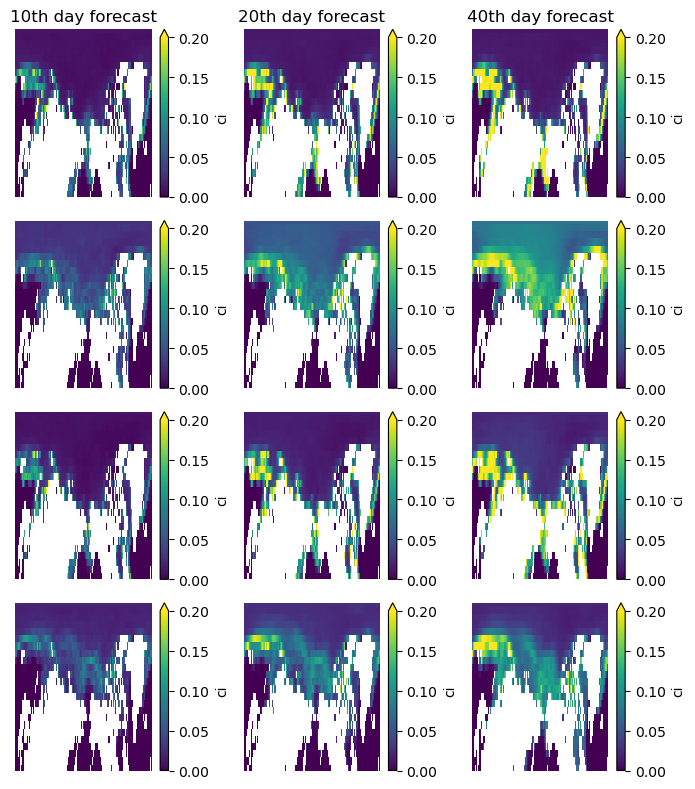

In [38]:
vmax=0.2
fig, axs = plt.subplots(4, 3, figsize=(7, 8))

for i in np.arange(0,4):
    stdallseas.isel(step=9).isel(season=i).plot(ax=axs[i,0],vmax=vmax)
    axs[i,0].axis('off')
    axs[i,0].set_ylim([55,90])
    axs[i,0].set_title('')
    
    stdallseas.isel(step=19).isel(season=i).plot(ax=axs[i,1],vmax=vmax)
    axs[i,1].axis('off')
    axs[i,1].set_ylim([55,90])
    axs[i,1].set_title('')
    
    stdallseas.isel(step=39).isel(season=i).plot(ax=axs[i,2],vmax=vmax)
    axs[i,2].axis('off')
    axs[i,2].set_ylim([55,90])
    axs[i,2].set_title('')
    
axs[0,0].set_title('10th day forecast')
axs[0,1].set_title('20th day forecast')
axs[0,2].set_title('40th day forecast')

fig.tight_layout()
print('Standard deviation across the ensemble members')
print('Row 1 = DJF, Row 2 = MAM, etc')

[ 90.    89.25  87.75  86.25  84.75  83.25  81.75  80.25  78.75  77.25
  75.75  74.25  72.75  71.25  69.75  68.25  66.75  65.25  63.75  62.25
  60.75  59.25  57.75  56.25  54.75  53.25  51.75  50.25  48.75  47.25
  45.75  44.25  42.75  41.25  39.75  38.25  36.75  35.25  33.75  32.25
  30.75  29.25  27.75  26.25  24.75  23.25  21.75  20.25  18.75  17.25
  15.75  14.25  12.75  11.25   9.75   8.25   6.75   5.25   3.75   2.25
   0.75  -0.75  -2.25  -3.75  -5.25  -6.75  -8.25  -9.75 -11.25 -12.75
 -14.25 -15.75 -17.25 -18.75 -20.25 -21.75 -23.25 -24.75 -26.25 -27.75
 -29.25 -30.75 -32.25 -33.75 -35.25 -36.75 -38.25 -39.75 -41.25 -42.75
 -44.25 -45.75 -47.25 -48.75 -50.25 -51.75 -53.25 -54.75 -56.25 -57.75
 -59.25 -60.75 -62.25 -63.75 -65.25 -66.75 -68.25 -69.75 -71.25 -72.75
 -74.25 -75.75 -77.25 -78.75 -80.25 -81.75 -83.25 -84.75 -86.25 -87.75
 -89.25 -90.  ]


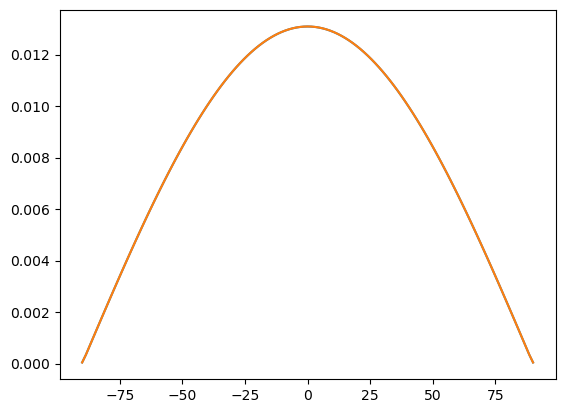

In [33]:
# compute the area weights by latitude two ways and compare
# since simple cosine weighting doesn't work at the 90N and 90S grid latitude

lat=ds.latitude
earthrad=6.37122e6 
deg2rad=np.pi/180; 
lat_bounds=np.zeros(len(lat)+1)
lat_bounds[0]=90.
lat_bounds[-1]=-90.
lat_bounds[1:-1]=(lat[0:-1].values+lat[1:].values)/2.
print(lat_bounds)

# steps in sin(latitude)
del_phi=np.sin(lat_bounds[1:]*deg2rad)-np.sin(lat_bounds[0:-1]*deg2rad)

#cellarea=del_phi*2.*np.pi*earthrad**2/nlon;
#cellarea=cellarea'*ones(1,nlon);
weights=del_phi/np.sum(del_phi)
weights2=np.cos(ds.latitude*deg2rad)
weights2=weights2/weights2.sum()
# fix end points of weights2
weights2[0]=weights[0]
weights2[-1]=weights[-1]

plt.plot(ds.latitude,weights)
plt.plot(ds.latitude,weights2)

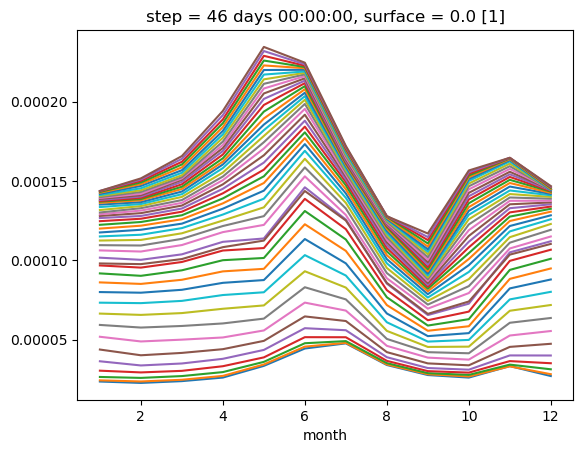

In [20]:
for i in stdallclimo.step:
    (stdallclimo.sel(step=i)*weights2).isel(latitude=range(0,24)).mean(dim='latitude').mean(dim='longitude').plot()

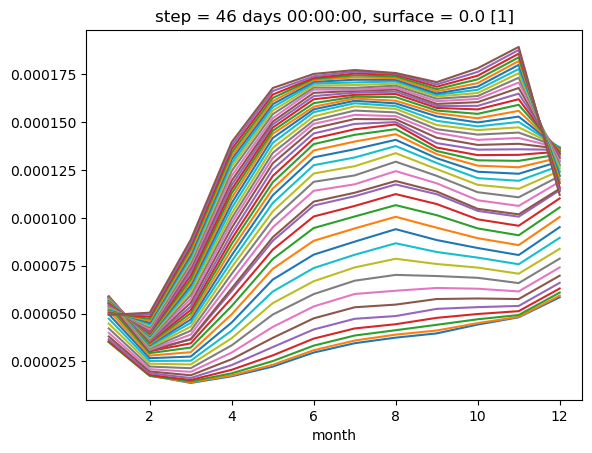

In [32]:
for i in stdallclimo.step:
    (stdallclimo.sel(step=i)*weights2).isel(latitude=range(80,120)).mean(dim='latitude').mean(dim='longitude').plot()

In [31]:
stdallclimo.latitude[80:]

<xarray.DataArray 'latitude' (latitude: 41)> Size: 328B
array([-30. , -31.5, -33. , -34.5, -36. , -37.5, -39. , -40.5, -42. , -43.5,
       -45. , -46.5, -48. , -49.5, -51. , -52.5, -54. , -55.5, -57. , -58.5,
       -60. , -61.5, -63. , -64.5, -66. , -67.5, -69. , -70.5, -72. , -73.5,
       -75. , -76.5, -78. , -79.5, -81. , -82.5, -84. , -85.5, -87. , -88.5,
       -90. ])
Coordinates:
    surface   float64 8B 0.0
  * latitude  (latitude) float64 328B -30.0 -31.5 -33.0 ... -87.0 -88.5 -90.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing